In [188]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [189]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [190]:
NUM_CLASSES = 37

# Dataset reading

In [191]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [192]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [194]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [195]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_20 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 37)             │           407 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,477 (5.77 KB)

 Trainable params: 1,477 (5.77 KB)

 Non-trainable params: 0 (0.00 B)

In [196]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# # Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [197]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [198]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/27 ━━━━━━━━━━━━━━━━━━━━ 7s 280ms/step - accuracy: 0.0391 - loss: 3.6216
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras

Epoch 1: finished saving model to model/keypoint_classifier/keypoint_classifier.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0320 - loss: 3.6169 - val_accuracy: 0.0314 - val_loss: 3.5862
Epoch 2/1000
 1/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0078 - loss: 3.6061
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras

Epoch 2: finished saving model to model/keypoint_classifier/keypoint_classifier.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0419 - loss: 3.5844 - val_accuracy: 0.0645 - val_loss: 3.5654
Epoch 3/1000
 1/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0312 - loss: 3.5721
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras

Epoch 3: finished saving model to model/keypoint_classifier/keypoint_classifier.keras
27/27 ━━━━━━━━━━━━

In [199]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6295 - loss: 1.3190


In [200]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [201]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[1.3415738e-04 1.4125967e-02 3.8397454e-02 2.1956382e-02 2.7239525e-03
 7.9916482e-04 8.9021819e-03 6.8589784e-03 7.4868457e-04 6.0290791e-04
 6.2650163e-04 9.3978671e-03 1.1947873e-04 8.8136336e-03 5.6262757e-04
 1.0645068e-03 4.4418438e-04 1.7171784e-03 2.7266823e-02 2.2474687e-05
 1.7141064e-01 2.8419314e-04 7.8294968e-04 3.1710644e-03 2.1273342e-04
 1.9279580e-03 6.3393949e-05 7.1604282e-02 3.4804150e-04 7.3896599e-04
 3.1538028e-01 2.6807955e-01 1.7938938e-02 1.7920734e-03 9.7986532e-04
 1.5083150e-09 8.9584856e-10]
30


# Confusion matrix

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step


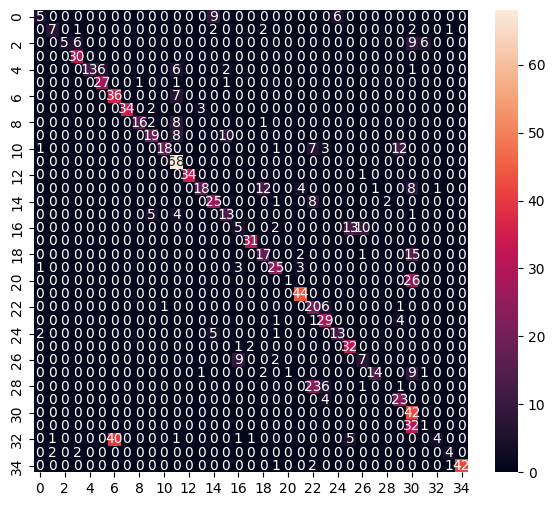

Classification Report
              precision    recall  f1-score   support

           0       0.56      0.25      0.34        20
           1       0.70      0.47      0.56        15
           2       1.00      0.19      0.32        26
           3       0.77      1.00      0.87        30
           4       1.00      0.46      0.63        28
           5       0.82      0.90      0.86        30
           6       0.47      0.84      0.61        43
           7       1.00      0.87      0.93        39
           8       0.94      0.59      0.73        27
           9       0.68      0.51      0.58        37
          10       0.95      0.43      0.59        42
          11       0.66      1.00      0.80        68
          12       1.00      0.97      0.99        35
          13       0.82      0.41      0.55        44
          14       0.61      0.69      0.65        36
          15       0.50      0.57      0.53        23
          16       0.26      0.17      0.20        30
     

In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [203]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [204]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmpcr27bb2c/assets


INFO:tensorflow:Assets written to: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmpcr27bb2c/assets


Saved artifact at '/var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmpcr27bb2c'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_10')
Output Type:
  TensorSpec(shape=(None, 37), dtype=tf.float32, name=None)
Captures:
  13489251984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13489248528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13489252176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13489251216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13489252752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13489256976: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1768687009.723086  381474 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1768687009.723094  381474 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2026-01-17 14:56:49.723183: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmpcr27bb2c
2026-01-17 14:56:49.723440: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2026-01-17 14:56:49.723445: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmpcr27bb2c
2026-01-17 14:56:49.725853: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2026-01-17 14:56:49.740136: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmpcr27bb2c
2026-01-17 14:56:49.744643: I tensorflow/cc/saved_model/loader.cc:

8056

# Inference test

In [205]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [206]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [207]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [208]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 29 μs, sys: 9 μs, total: 38 μs
Wall time: 33.1 μs


In [209]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.3415740e-04 1.4125967e-02 3.8397454e-02 2.1956390e-02 2.7239525e-03
 7.9916482e-04 8.9021800e-03 6.8589784e-03 7.4868416e-04 6.0290768e-04
 6.2650134e-04 9.3978653e-03 1.1947880e-04 8.8136289e-03 5.6262757e-04
 1.0645069e-03 4.4418412e-04 1.7171777e-03 2.7266819e-02 2.2474689e-05
 1.7141056e-01 2.8419300e-04 7.8294968e-04 3.1710628e-03 2.1273343e-04
 1.9279580e-03 6.3393891e-05 7.1604311e-02 3.4804168e-04 7.3896634e-04
 3.1538028e-01 2.6807955e-01 1.7938936e-02 1.7920743e-03 9.7986532e-04
 1.5083123e-09 8.9584862e-10]
30
